# MLOps Zoomcamp - Intro

Kickoff MLOps Zoomcamp course.

First Homework tasks https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/01-intro/homework.md 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

import pickle

<br>

<br>

# Homework
The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data
We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?

In [2]:
df = pd.read_parquet('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet')

In [3]:
print('Total number of records = ',df.shape[0])

Total number of records =  1154112


<br>

<br>

## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in january?

In [4]:
df['ride_duration'] = df.dropOff_datetime - df.pickup_datetime
df.ride_duration = df.ride_duration.apply(lambda x: x.total_seconds() / 60)

In [5]:
print('Average ride duration = ', round(df.ride_duration.mean(),2),'seconds')

Average ride duration =  19.17 seconds


<br>

<br>

## Data preparation
Check the distribution of the duration variable. There are some outliers.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

In [6]:
df = df[(df.ride_duration >= 1) & (df.ride_duration<= 60)]

<AxesSubplot:xlabel='ride_duration', ylabel='Count'>

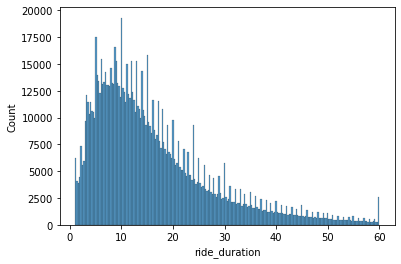

In [51]:
sns.histplot(df.ride_duration)

In [8]:
print(f'Number of records droped = {1154112 - df.shape[0]}')

Number of records droped = 44286


<br>

<br>

## Q3. Missing values
The features we'll use for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1".

What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.

In [9]:
df[['PUlocationID', 'DOlocationID']] = df[['PUlocationID', 'DOlocationID']].fillna(value = -1)

In [10]:
pct_missing = df[['PUlocationID']].value_counts(normalize=True).iloc[0]
print(f'Fractions of missing values for the pickup location ID = {round(pct_missing*100,2)} %')

Fractions of missing values for the pickup location ID = 83.53 %


<br>

<br>

## Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix? (The number of columns).

In [11]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

print('Matrix dimensionality = ', X_train.shape[1])

Matrix dimensionality =  525


<br>

<br>

## Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [33]:
y_train = df['ride_duration'].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print(f'Plain Linear Regression - RMSE on Train Set =  {rmse_train:.2f}')

Plain Linear Regression - RMSE on Train Set =  10.53


<br>

<br>

## Q6. Evaluating the model
Now let's apply this model to the validation dataset (Feb 2021).

What's the RMSE on validation?

In [43]:
def load_process_val_data(data_address, dv):
    
    # Load data
    df_ = pd.read_parquet(data_address)

    # Create target
    df_['ride_duration'] = df_.dropOff_datetime - df_.pickup_datetime
    df_.ride_duration = df_.ride_duration.apply(lambda x: x.total_seconds() / 60)

    # Drop outliers
    df_ = df_[(df_.ride_duration >= 1) & (df_.ride_duration<= 60)]
    
    # One-hot-encoding, missing and vectorizing
    df_[['PUlocationID', 'DOlocationID']] = df_[['PUlocationID', 'DOlocationID']].fillna(value = -1)
    categorical = ['PUlocationID', 'DOlocationID']
    df_[categorical] = df_[categorical].astype(str)   
    
    val_dicts = df_[categorical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    y_val = df_['ride_duration'].values
    
    return X_val, y_val, val_dicts

In [44]:
X_val, y_val, val_dicts = load_process_val_data('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet', dv)
y_pred_val = lr.predict(X_val)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
print(f'Plain Linear Regression - RMSE on Validation Set =  {rmse_val:.2f}')

Plain Linear Regression - RMSE on Validation Set =  11.01
